<a href="https://colab.research.google.com/github/AlyGamalAbusenna/Polynomial-Regression/blob/main/Lab_1_Keras_7454.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load the dataset and preprocessing


In [2]:
df = pd.read_csv('orbit.csv')
df.head()

,time_steps,y
0,-10.000000,100.000000
1,-9.989995,99.800000
2,-9.979990,99.600200
3,-9.969985,99.400601
4,-9.959980,99.201201


In [3]:
df.dtypes

,0
time_steps,float64
y,float64


In [4]:
print(df.isnull().sum())
print(df.shape)

time_steps    0
y             0
dtype: int64
(2000, 2)


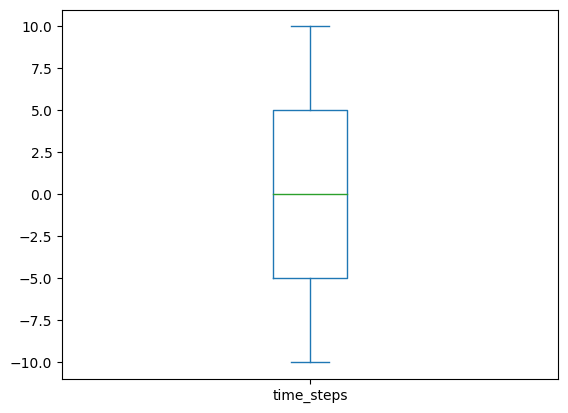

In [5]:
df['time_steps'].plot(kind='box')
plt.show()

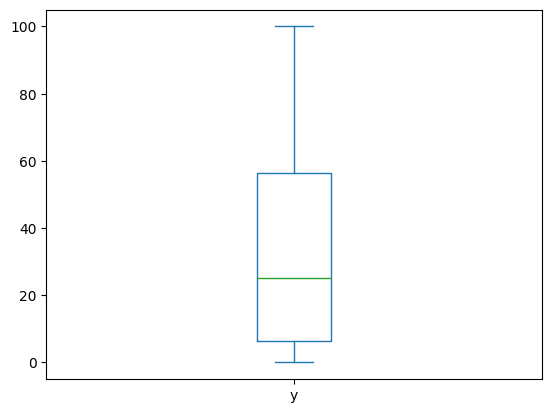

In [6]:
df['y'].plot(kind='box')
plt.show()

In [7]:
print("The skewness of the original data is {}".format(df.y.skew()))

The skewness of the original data is 0.6393540242424569


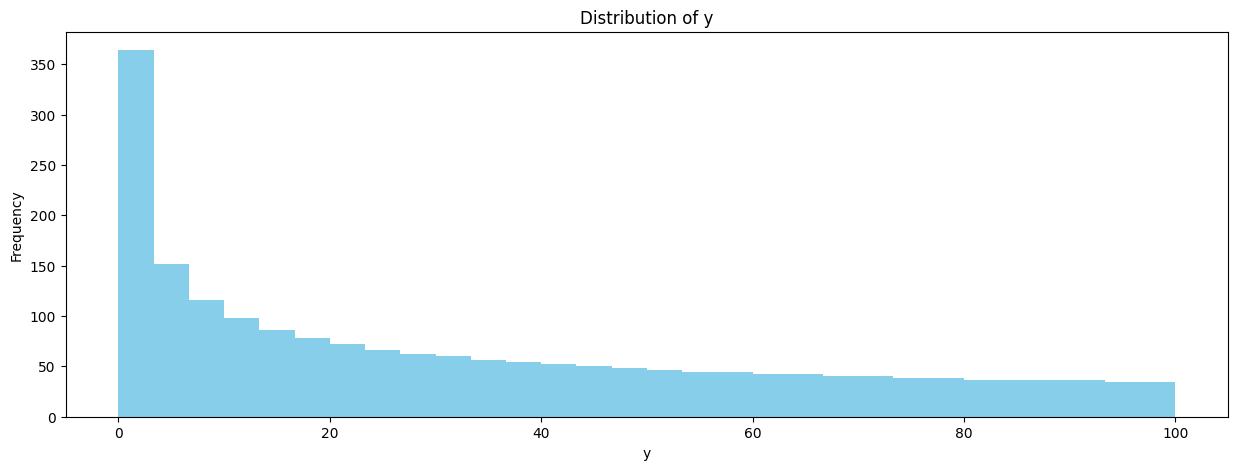

In [8]:
plt.figure(figsize=(15, 5))
plt.hist(df['y'], bins=30, color='skyblue')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.title('Distribution of y')
plt.show()


# Normalize the dataset

In [9]:
# Initialize the scaler for normalization                         #X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
scaler = MinMaxScaler()                                           #X_scaled = X_std * (max - min) + min

# Apply normalization to both the time_steps and y columns
df[['time_steps', 'y']] = scaler.fit_transform(df[['time_steps', 'y']])

# Display the normalized dataset
df.head()

,time_steps,y
0,0.000000,1.000000
1,0.000500,0.998000
2,0.001001,0.996002
3,0.001501,0.994006
4,0.002001,0.992012


# Split the data into training and validation sets

In [10]:
# Separate features (time_steps) and target (y)
X = df['time_steps'].values.reshape(-1, 1)
y = df['y'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)     # random_state controls the shuffling

# Build the neural network model

**Neural Network Structure**

*   Input Layer: The model takes time_steps as input, which is a single feature.
*   Hidden Layers: The network will contain two hidden layers, each with 64 neurons, and we use the ReLU activation function to introduce non-linearity.
*   Output Layer: The output is a single neuron because this is a regression task where we predict a continuous value (y).






In [11]:
# Define the neural network model for polynomial regression
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model using MSE and MAE as metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.1071 - mae: 0.2568 - val_loss: 0.0850 - val_mae: 0.2470
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0912 - mae: 0.2568 - val_loss: 0.0809 - val_mae: 0.2323
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0822 - mae: 0.2444 - val_loss: 0.0726 - val_mae: 0.2253
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0772 - mae: 0.2377 - val_loss: 0.0632 - val_mae: 0.2079
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0650 - mae: 0.2195 - val_loss: 0.0476 - val_mae: 0.1747
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0415 - mae: 0.1675 - val_loss: 0.0261 - val_mae: 0.1318
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mae: 0.1223 - val_loss: 0.0124 - val_mae: 0.0788
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mae: 0.0760 - val_loss: 0.0059 - val_mae: 0.0545
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 

# Evaluate the model

In [13]:
# Evaluate the model performance on the validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)

print(f'Validation MAE: {val_mae}')

# Generate predictions
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)

print(f'R² Score: {r2:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7830e-05 - mae: 0.0034 
Validation MAE: 0.0034703321289271116
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
R² Score: 0.9998


# Visualize training history

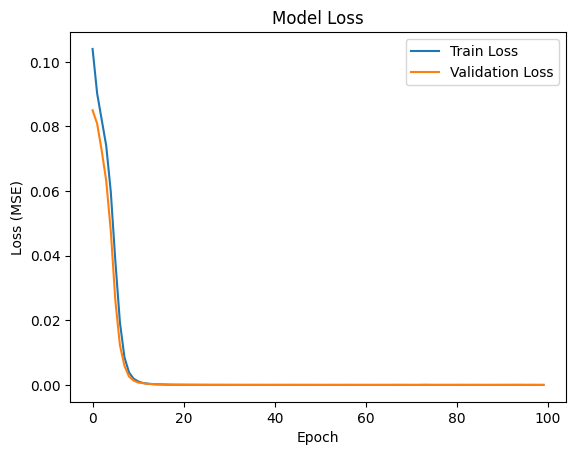

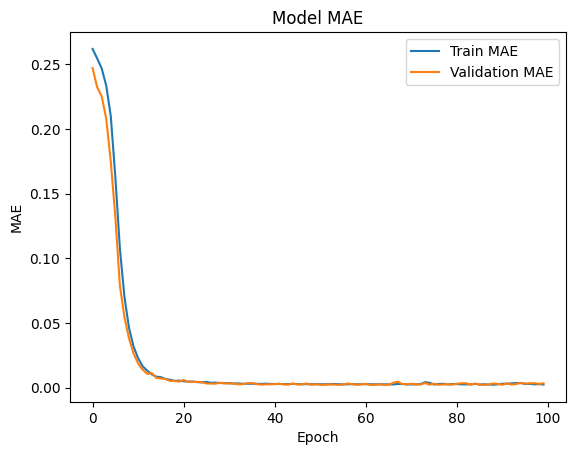

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Visualize actual vs predicted values

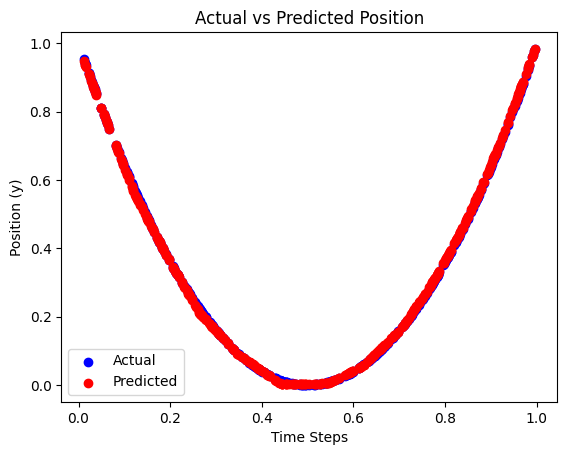

In [15]:
# Plot the actual vs predicted values
plt.scatter(X_val, y_val, color='blue', label='Actual')
plt.scatter(X_val, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Position')
plt.xlabel('Time Steps')
plt.ylabel('Position (y)')
plt.legend()
plt.show()